In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [13]:
#nb_path = pathlib.Path().resolve()
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\dandan\Output_dataframe'

In [14]:
df = pd.read_csv(os.path.join(data_path,'NYBG_Carbon_fluxes.csv'))

In [15]:
#df.replace('BG_UL3','BG_ML3',inplace=True)
df['type'] = df['Label'].str[-3:-1]

In [15]:
df.Label.unique()

array(['BW_TP1', 'BW_TP2', 'BW_TP3', 'BW_TP4', 'BT_FE1', 'BT_FE2',
       'BT_FE3', 'BT_FE4', 'BT_FI1', 'BT_FI2', 'BT_FI3', 'BT_FI4',
       'BE_UL1', 'BE_UL2', 'BG_UL3', 'BG_UL4', 'BL_SV1', 'BL_SV2',
       'BE_SV3', 'BE_SV4', 'BL_ML1', 'BL_ML2', 'BL_ML3', 'BL_ML4',
       'BW_HL1', 'BW_HL2', 'BR_HL3', 'BR_HL4'], dtype=object)

In [47]:
df.replace('HL','ML',inplace=True)

In [ ]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed'
df.to_csv(os.path.join(data_path,'nybg_fluxes.csv'))   

In [82]:
df.Label.unique()

array(['BW_TP1', 'BW_TP2', 'BW_TP3', 'BW_TP4', 'BT_FE1', 'BT_FE2',
       'BT_FE3', 'BT_FE4', 'BT_FI1', 'BT_FI2', 'BT_FI3', 'BT_FI4',
       'BE_UL1', 'BE_UL2', 'BG_UL3', 'BG_UL4', 'BL_SV1', 'BL_SV2',
       'BE_SV3', 'BE_SV4', 'BL_ML1', 'BL_ML2', 'BL_ML3', 'BL_ML4',
       'BW_HL1', 'BW_HL2', 'BR_HL3', 'BR_HL4'], dtype=object)

In [17]:
grouped = df.groupby('Label')

In [34]:
grouped.get_group('BE_SV3')

,Unnamed: 0,Date,DT_R,DT_NEE,Label,Res,NEE,NEE1,NEE2,GEE,PAR,Soil temperature,Soil_moist,type
18,18,20220523,[],[],BE_SV3,NaN,NaN,NaN,NaN,NaN,350.0,19.3,55.1,SV
46,46,20220531,"[datetime.datetime(2022, 5, 31, 11, 4, 23)]","[datetime.datetime(2022, 5, 31, 11, 37, 26)]",BE_SV3,7.95627,-7.93437,NaN,NaN,-15.89064,NaN,20.9,45.4,SV
74,74,20220607,"[datetime.datetime(2022, 6, 7, 9, 44, 34)]","[datetime.datetime(2022, 6, 7, 9, 27, 27)]",BE_SV3,4.44188,2.25229,NaN,NaN,-2.18959,NaN,19.1,56.2,SV
102,102,20220615,"[datetime.datetime(2022, 6, 15, 10, 18, 36)]","[datetime.datetime(2022, 6, 15, 10, 54, 20)]",BE_SV3,5.04408,3.88537,NaN,NaN,-1.15871,35.0,NaN,NaN,SV
130,130,20220628,"[datetime.datetime(2022, 6, 28, 13, 48, 46)]",[],BE_SV3,5.61729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SV
158,158,20220701,"[datetime.datetime(2022, 7, 1, 8, 36, 57)]",[],BE_SV3,5.90584,NaN,NaN,NaN,NaN,NaN,21.5,34.6,SV
186,186,20220706,"[datetime.datetime(2022, 7, 6, 10, 19, 46)]",[],BE_SV3,4.14766,NaN,NaN,NaN,0.00000,90.0,23.5,28.9,SV
214,214,20220722,"[datetime.datetime(2022, 7, 22, 11, 47)]",[],BE_SV3,6.92096,NaN,NaN,NaN,0.00000,40.0,25.4,35.7,SV
242,242,20220804,"[datetime.datetime(2022, 8, 4, 9, 17, 1)]",[],BE_SV3,6.28635,8.33948,NaN,NaN,2.05313,NaN,NaN,NaN,SV
270,270,20220816,"[datetime.datetime(2022, 8, 16, 10, 32, 21)]",[],BE_SV3,2.27830,4.24143,NaN,NaN,1.96313,25.0,20.3,19.7,SV


In [11]:
def make_kde_plot_temps(grouped,bw):
    fig, ax = plt.subplots(figsize=(20,8))

    for lawn_type in ['BE_SV3', 'BE_UL1', 'BG_UL3', 'BL_ML1', 'BR_HL3','BW-HL1']:
        group = grouped.get_group(lawn_type)
        sns.kdeplot(group['Soil temperature'], ax=ax, shade=True, bw_adjust=bw)
    #sns.kdeplot(bgul3['Soil temperature'],ax=ax,shade=True,bw_adjust=bw)

    plt.legend(['BE_SV3', 'BE_UL1', 'BG_UL3', 'BL_ML1', 'BR_HL3','BW-HL1'])
    ax.set_title('NYBG Temperature KDE Plot')
    
    out_path = r'C:\Users\roseh\Desktop\NYBG_R\reports\figures'
    #plt.savefig(os.path.join(out_path,'nybg_kde_resp_3categories.png'))

    plt.show()

In [35]:
def make_kde_plot_res(grouped,bw):
    fig, ax = plt.subplots()

    for lawn_type in ['BE_SV3', 'BE_UL1','BE_UL2']:
        group = grouped.get_group(lawn_type)
        sns.kdeplot(group['Res'], ax=ax,shade=True, bw_adjust=bw)

    plt.legend(['BE_SV3', 'BE_UL1', 'BE_UL2'])
    ax.set_title('NYBG Respiration KDE Plot')
    
    out_path = r'C:\Users\roseh\Desktop\NYBG_R\reports\figures'
    #plt.savefig(os.path.join(out_path,'nybg_temps_2categories_ul3.png'))

    plt.show()

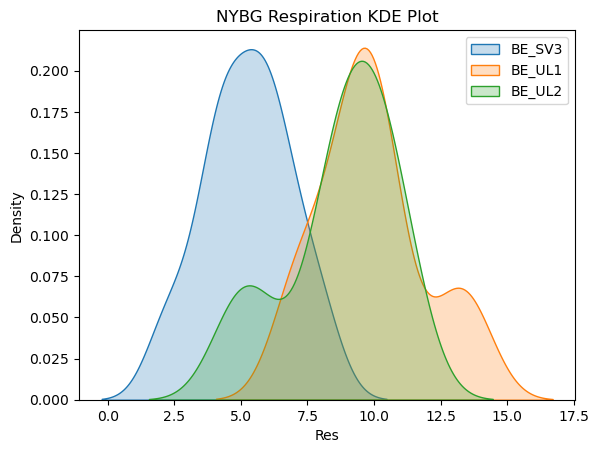

In [36]:
make_kde_plot_res(grouped,.8)

In [79]:
# recategorize all Hot Lawn as Managed Lawn
df_recat = df.replace('HL','ML')

In [80]:
grouped_recat = df_recat.groupby('type')

In [39]:
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\processed\QC2\Temp_Sensors'

In [44]:
temps = pd.read_csv(os.path.join(data_path,'all_temp_sensors.csv'),na_values= ' ',dtype={'Temp_F': np.float32})
temps.dropna(inplace=True)
temps['Soil temperature'] = (temps['Temp_F'] - 32) * (5/9)
temps.replace('BG_UL3','BG_ML3',inplace=True)
temps.replace('BE_SV3','BE_UL3',inplace=True)
temps['type'] = temps['collar'].str[-3:-1]
temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102456 entries, 0 to 102546
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              102456 non-null  object 
 1   Temp_F            102456 non-null  float32
 2   collar            102456 non-null  object 
 3   Soil temperature  102456 non-null  float32
 4   type              102456 non-null  object 
dtypes: float32(2), object(3)
memory usage: 3.9+ MB


In [45]:
temps.replace('HL','ML',inplace=True)

In [46]:
temps.type.unique()

array(['UL', 'ML', 'FE', 'FI', 'tp', 'TP'], dtype=object)

In [47]:
temps_grouped = temps.groupby('type')

In [48]:
temps_grouped_cols = temps.groupby('collar')

In [62]:
# print number of datapoints in each category
for lawn in ['HL','UL','ML']:
    print(lawn, len(temps_grouped.get_group(lawn)))

HL 19293
UL 19278
ML 6903


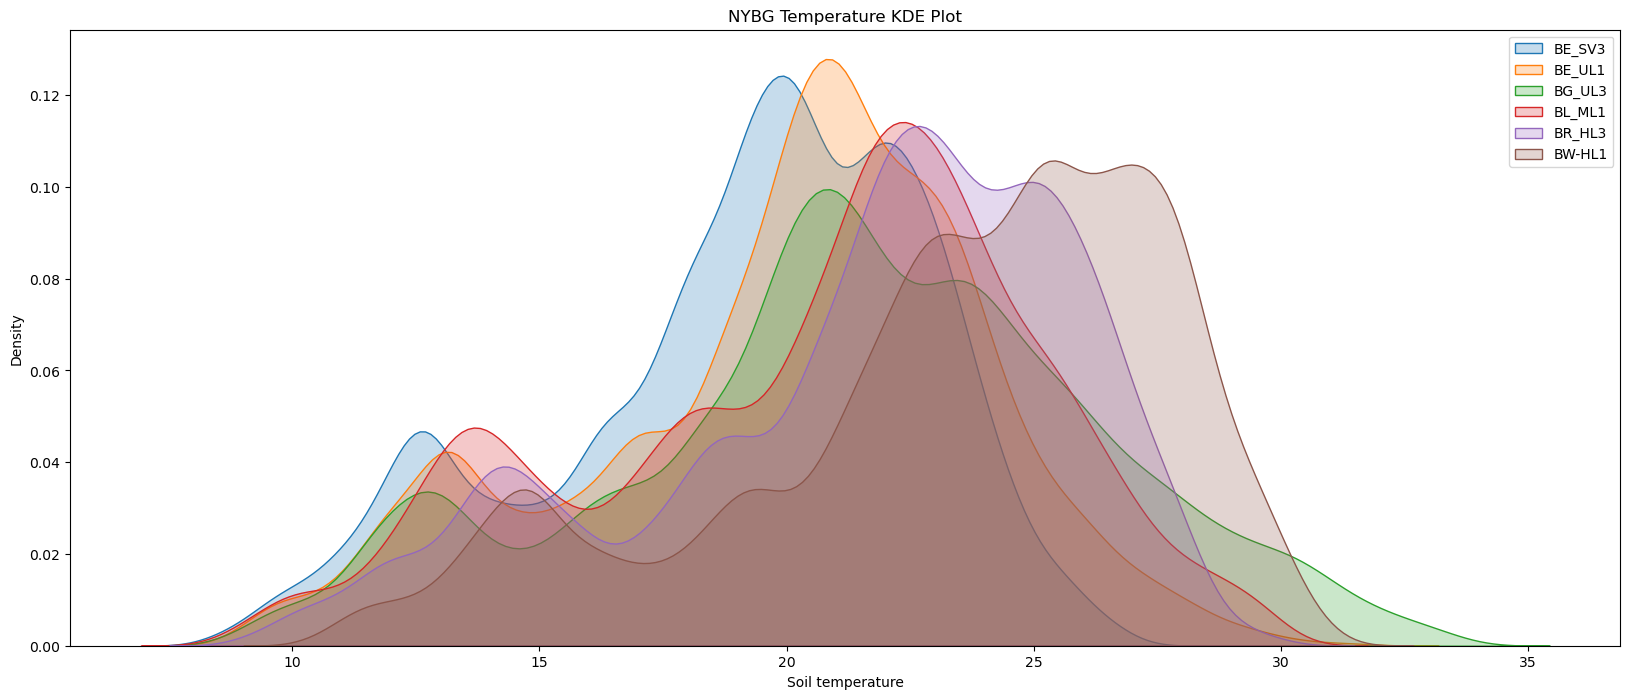

In [12]:
make_kde_plot_temps(temps_grouped_cols,.8)

In [69]:
# recategorize Hot Lawn to Managed Lawn
temps_recat = temps.replace('HL','ML')
temps_recat_grouped = temps_recat.groupby('type')

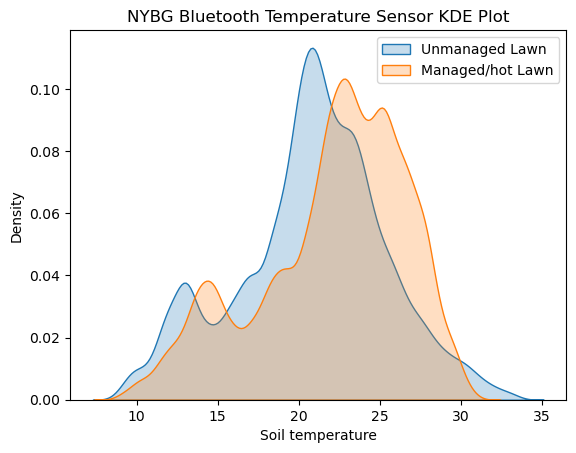

In [70]:
make_kde_plot_2(temps_recat_grouped,.8)

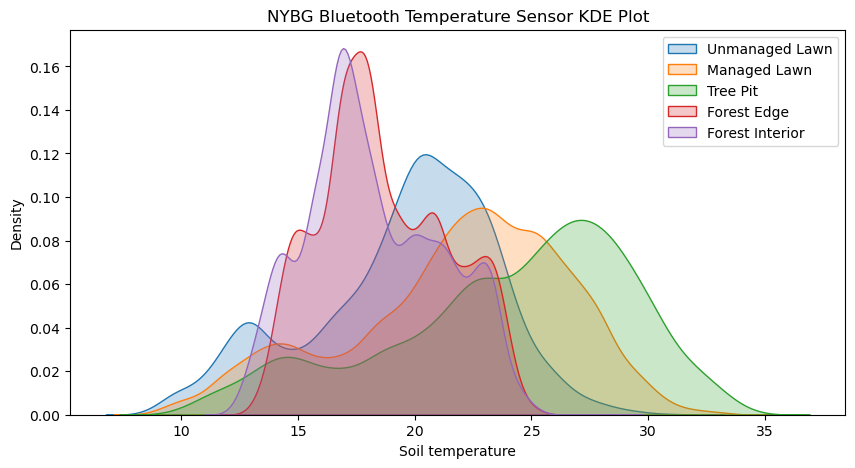

In [51]:
fig, ax = plt.subplots(figsize=(10,5))

for lawn_type in ['UL','ML', 'TP', 'FE', 'FI']:
    group = temps_grouped.get_group(lawn_type)
    sns.kdeplot(group['Soil temperature'], ax=ax,shade=True,bw_adjust=1)
    
plt.legend(['Unmanaged Lawn','Managed Lawn', 'Tree Pit', 'Forest Edge', 'Forest Interior'])
ax.set_title('NYBG Bluetooth Temperature Sensor KDE Plot')
out_path = r'C:\Users\roseh\Desktop\NYBG_R\reports\figures'
plt.savefig(os.path.join(out_path,'kde_temps_alltypes_recat.png'))
plt.show()